In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

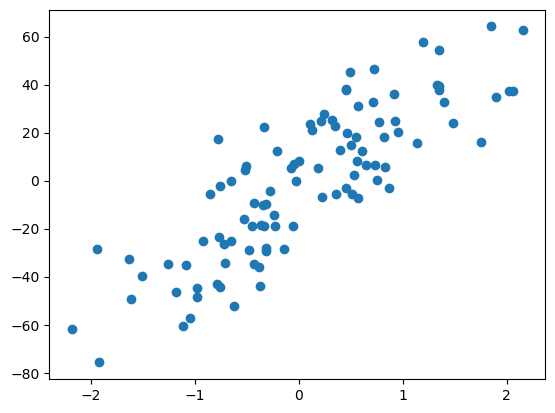

In [2]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)
plt.scatter(x,y)

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [4]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(x, y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235726


In [5]:
rr2 = Ridge(alpha=100)
rr2.fit(x, y)
print(rr2.coef_)
print(rr2.intercept_)

[12.93442104]
-1.4248441496033308


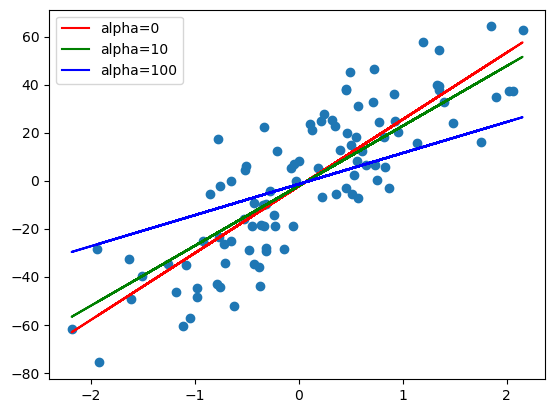

In [6]:
plt.scatter(x, y)
plt.plot(x, lr.predict(x), color='r', label='alpha=0')
plt.plot(x, rr.predict(x), color='g', label='alpha=10')
plt.plot(x, rr2.predict(x), color='b', label='alpha=100')
plt.legend()

# Replicating Ridge Regressor Class

In [8]:
class RidgeRegressor:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.coef_ = None #m
        self.intercept_ = None #b
    def fit(self, x_train, y_train):
        y_mean = np.mean(y_train)
        x_mean = np.mean(x_train)
        num, den = 0, 0
        for i in range(x_train.shape[0]):
            num += (y_train[i]-y_mean)*(x_train[i]-x_mean)
            den += (x_train[i]-x_mean)*(x_train[i]-x_mean) 
        den += self.alpha
        self.coef_ = num/den
        self.intercept_ = y_mean - self.coef_*x_mean
        print(self.coef_)
        print(self.intercept_)
        
    def predict(self, x_test):
        pass

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

In [11]:
rr3 = RidgeRegressor(10)
rr3.fit(x_train, y_train)

[24.63922736]
[-2.62715536]


# Implementing Multivariate Ridge Regressor

In [13]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [14]:
x, y = load_diabetes(return_X_y=True)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.1, solver='cholesky')
rr.fit(x_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [16]:
y_pred = rr.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(r2)
print(rr.coef_)
print(rr.intercept_)

0.46085219464119254
[  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]
151.4585745667961


# Replicating multivariate Ridge Regressor

In [36]:
class MultivariateRidgeRegressor:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, x_train, y_train):
        x_train = np.insert(x_train, 0, 1, axis=1)
        # b = (X_trans*X + (lambda*I)^-1 )(X_trans*Y)
        I = np.identity(x_train.shape[1])
        I[0][0] = 0
        # The reason of using [0][0]=0 is that because in our metrix beta the first term is basically intercept not slope and we have to multiply Lambda with only slopes.
        res = np.linalg.inv(np.dot(x_train.T, x_train) + self.alpha*I).dot(x_train.T).dot(y_train)
        self.intercept_ = res[0]
        self.coef_ = res[1:]
       
    def predict(self, x_test):
        return np.dot(x_test, self.coef_) + self.intercept_

In [38]:
mrr = MultivariateRidgeRegressor()
mrr.fit(x_train, y_train)
y_pred = mrr.predict(x_test)
print(r2_score(y_test, y_pred))
print(mrr.intercept_)
print(mrr.coef_)

0.46085219464119254
151.45857456679613
[  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]
